# DESAFIO ONCASE QUESTÃO 1 MODELAGEM

---

NOME: ÍCARO JOSIAS FERREIRA PAIVA

EMAIL: ijfp@cin.ufpe.br

Nessa parte, será necessário implementar um algoritmo de acordo com o paradigma do problema. Cada problema tem um conjunto de métricas que são requeridas. A variável alvo sempre será a coluna de nome “target”, exceto para os problemas não-supervisionados.

1. Construa um classificador e identifique quais variáveis exercem maior impacto sobre o “target” e informe o porquê interpretando os resultados obtidos. 

> a. métricas: precision, recall e F1-score;

> b. dados: classification_data.zip;

## 0 IMPORTAÇÃO

### 0.1 IMPORTAR BIBLIOTECAS

In [1]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns


from sklearn.preprocessing     import StandardScaler
from sklearn.neighbors         import KNeighborsClassifier
from sklearn.model_selection   import train_test_split, GridSearchCV, RepeatedStratifiedKFold

from sklearn.metrics           import precision_score, f1_score, recall_score, make_scorer, plot_confusion_matrix, confusion_matrix, classification_report
from sklearn.model_selection   import GridSearchCV, train_test_split, cross_val_score,cross_validate

### 0.2 IMPORTAR CONJUNTO DE DADOS

In [2]:
df_raw_train = pd.read_csv('/content/drive/MyDrive/DESAFIO/ONCASE/classification_train.csv')
df_raw_test = pd.read_csv('/content/drive/MyDrive/DESAFIO/ONCASE/classification_test.csv')

In [3]:
df_raw_train.head()

,x1,x2,target
0,1.934224,-0.111822,1
1,1.767383,-0.976402,1
2,0.937101,-0.085633,1
3,1.340732,0.166960,1
4,-0.199901,-0.155204,1


In [4]:
df_train = df_raw_train.copy()
class_train = df_train.pop('target')
df_train.head()

,x1,x2
0,1.934224,-0.111822
1,1.767383,-0.976402
2,0.937101,-0.085633
3,1.340732,0.166960
4,-0.199901,-0.155204


In [5]:
df_raw_test.head()

,x1,x2,target
0,1.114204,-0.434321,1
1,-1.238490,0.521390,0
2,-0.091781,-0.169471,1
3,0.298820,0.076368,0
4,-0.265779,0.479812,1


In [6]:
df_test = df_raw_test.copy()
class_test = df_test.pop('target')
df_test.head()

,x1,x2
0,1.114204,-0.434321
1,-1.238490,0.521390
2,-0.091781,-0.169471
3,0.298820,0.076368
4,-0.265779,0.479812


## 1 EXPLORAÇÃO DOS DADOS

#### 1.1 DESCRIÇÃO DOS DADOS

In [7]:
print('Número de amostras: {}'.format(df_raw_train.shape[0]))
print('Número de varaivéis: {}'.format(df_raw_train.shape[1]))

Número de amostras: 670
Número de varaivéis: 3


In [8]:
df_raw_train.describe()

,x1,x2,target
count,670.000000,670.000000,670.000000
mean,0.481824,0.262611,0.505970
std,0.914772,0.615023,0.500338
min,-1.939767,-1.313970,0.000000
25%,-0.169615,-0.159189,0.000000
50%,0.492489,0.275538,1.000000
75%,1.159680,0.717589,1.000000
max,2.590410,1.904169,1.000000


In [9]:
df_raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      670 non-null    float64
 1   x2      670 non-null    float64
 2   target  670 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 15.8 KB


In [10]:
df_raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      330 non-null    float64
 1   x2      330 non-null    float64
 2   target  330 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.9 KB


O Conjunto de Treino e Teste não apresenta valores faltantes

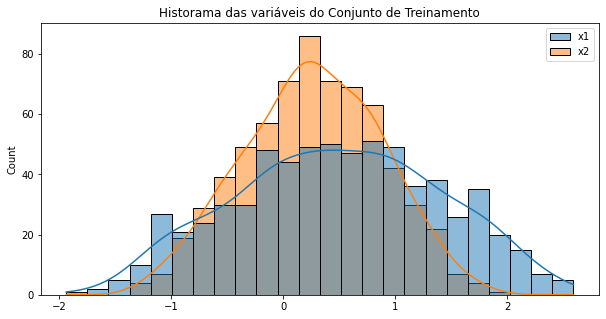

In [11]:
plt.figure(figsize=(10,5))
plt.title('Historama das variáveis do Conjunto de Treinamento')
sns.histplot(data=df_train, kde=True);

A Variável x1 e o x2 mais concentrados. 

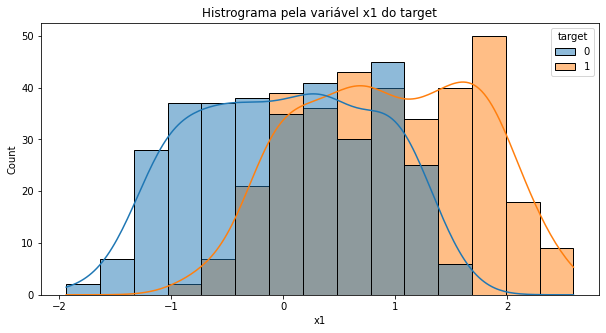

In [12]:
plt.figure(figsize=(10,5))
plt.title('Histrograma pela variável x1 do target')
sns.histplot(data=df_raw_train, x="x1", kde=True, hue="target");

os target tem distribuição distintas na Variável x1, porém apresentam sobreposição relevante.

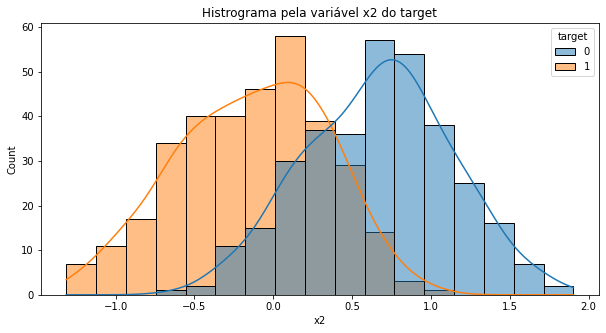

In [13]:
plt.figure(figsize=(10,5))
plt.title('Histrograma pela variável x2 do target')
sns.histplot(data=df_raw_train, x="x2", kde=True, hue="target");

Assim como na Variável x1, a Variável x2 apresenta distribuição distintas porém com pontos de sobreposição menores. Assim torna a Variável com potencial maior para explicar o valor do target.

### 1.2 RELAÇÃO DE VARIÁVEIS

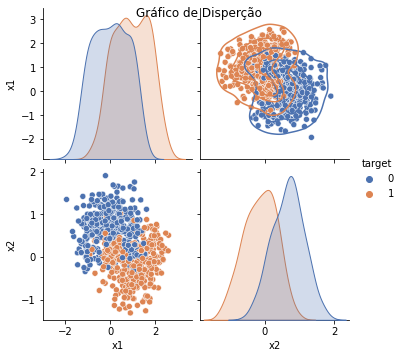

In [14]:
g = sns.pairplot(data=df_raw_train, hue='target', kind="scatter", palette="deep")
g.map_upper(sns.kdeplot, levels=4, color=".2")
g.fig.suptitle('Gráfico de Disperção');

A distribuição da vairável target do Conjunto de Treinamento não é linearmente separável.

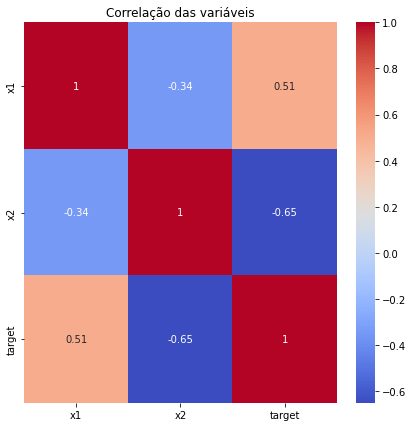

In [15]:
plt.figure(figsize=(7, 7))
plt.title('Correlação das variáveis')
sns.heatmap(df_raw_train.corr(), annot=True, cmap='coolwarm');

A variáveis x1 e x2 possuem um grau importante de correlação com a variável target. Como visto no histograma, a Variável x2 tem maior poder de explicar o target (correlação: 0.65) do que o x1 (correlação: 0.51)

## 2 PREPARAÇÃO DOS DADOS

### 2.1 NORMALIZAÇÃO DOS DADOS

In [16]:
#  Normalização dos Conjunto de Treinamento

scaler = StandardScaler()
df_train = scaler.fit_transform(df_train)

In [17]:
#  Normalização dos Conjunto de Teste

df_test = scaler.fit_transform(df_test)

### 2.2 DIVISÃO TREINO, VALIDAÇÃO E TESTE

In [18]:
# divisão entre Conjunto treino e validação

size_test = 0.35
seed = 34

X_train, X_val, y_train, y_val = train_test_split(df_train, class_train, test_size=size_test, random_state=seed)

In [19]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((435, 2), (235, 2), (435,), (235,))

In [20]:
# Separação do target para Conjunto de Teste

X_test, y_test = df_test, class_test
X_test.shape, y_test.shape

((330, 2), (330,))

## 3 MODELAGEM

### 3.1 BUSCA DE HIPERPARAMETROS

In [21]:
# Definindo hiperparametros e classificador
clf_knn_gs = KNeighborsClassifier()
hypeparameters_knn = {
    'n_neighbors': list(range(1,20)),
    'weights': ['uniform','distance']
}

# Inicializando busca paramentos
gs_knn = GridSearchCV(estimator=clf_knn_gs, 
                           param_grid= hypeparameters_knn, 
                           cv=10, n_jobs=-1, verbose=1, scoring = 'f1')

# Busca dos hiperparamentros
gs_knn.fit(X_train, y_train)

Fitting 10 folds for each of 38 candidates, totalling 380 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=1)

In [22]:
# Treinamento do modelo

clf_knn = gs_knn.best_estimator_
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [23]:
#Paramentros do modelo

clf_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 19,
 'p': 2,
 'weights': 'uniform'}

### 3.2 VALIDAÇÃO CRUZADA

In [24]:
# Definições do Kfold para cross validation

rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1234)

In [25]:
# Métricas de avaliação para o modelo

scoring = {'prec': 'precision',
           'recall': 'recall',
           'F1': 'f1'}

In [26]:
# cross validation no Conjunto de Validação

cv_scores_knn = cross_validate(clf_knn, X_val, y_val, cv=rskf, scoring=scoring)

In [27]:
val_recall = cv_scores_knn['test_recall']

print('No Conjunto de Validação o valor médio do Recall é de %0.2f +/- %0.2f' % (val_recall.mean(), val_recall.std()))

No Conjunto de Validação o valor médio do Recall é de 0.88 +/- 0.08


In [28]:
val_preci = cv_scores_knn['test_prec']

print('No Conjunto de Validação o valor médio do Precisão é de %0.2f +/- %0.2f' % (val_preci.mean(), val_preci.std()))

No Conjunto de Validação o valor médio do Precisão é de 0.91 +/- 0.07


In [29]:
val_f1 = cv_scores_knn['test_F1']

print('No Conjunto de Validação o valor médio do F1 é de %0.2f +/- %0.2f' % (val_f1.mean(), val_f1.std()))

No Conjunto de Validação o valor médio do F1 é de 0.89 +/- 0.06


## 4 RESULTADOS

In [30]:
#Previsão para o Conjunto de Teste

y_pred = clf_knn.predict(X_test)

In [31]:
print('Para o Conjunto de Teste o temos Recall: %.2f, Precisão: %0.2f e F1: %0.2f' %(recall_score(y_test, y_pred),precision_score(y_test, y_pred),f1_score(y_test, y_pred)))

Para o Conjunto de Teste o temos Recall: 0.92, Precisão: 0.84 e F1: 0.88


Apesar dos resultados serem bons, com valores acima de 0.8 algumas discrepancias com o Conjunto de Validação pede uma reavaliação do modelo. Também comparar com outros modelos para buscar resultados ainda melhores.